In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
print("Pandas version used: " + pd.__version__)
print("Matplotlib version used: " + plt.matplotlib.__version__)
print("Seaborn version used: " + sns.__version__)
print("Statsmodels version used: " + sm.__version__)
print("Scikit-learn version used: " + sklearn.__version__)

Pandas version used: 1.0.5
Matplotlib version used: 3.2.2
Seaborn version used: 0.10.1
Statsmodels version used: 0.11.1
Scikit-learn version used: 0.23.1


In [2]:
# Read in the cleaned data:
ins_data = pd.read_csv("ins_data_clean.csv")

In [3]:
ins_data.head()

,Unnamed: 0,Unnamed: 0.1,age,bmi,charges,sex_female,smoker_yes
0,0,0,19,27.90,16884.92,1,1
1,1,1,18,33.77,1725.55,0,0
2,2,2,28,33.00,4449.46,0,0
3,3,3,33,22.70,21984.47,0,0
4,4,4,32,28.88,3866.86,0,0


In [4]:
# Let's split the data into training and testing sets. We will do a 70/30 split:
ins_data_train, ins_data_test = train_test_split(ins_data, test_size=0.3)

In [5]:
# X will be our training data with the relevant columns elected
X = ins_data_train[['age','bmi','sex_female','smoker_yes']]
# y represents the charges 
y = ins_data_train.charges
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     717.7
Date:                Tue, 22 Sep 2020   Prob (F-statistic):          1.29e-282
Time:                        14:58:02   Log-Likelihood:                -9488.8
No. Observations:                 936   AIC:                         1.899e+04
Df Residuals:                     931   BIC:                         1.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.098e+04   1145.561     -9.584      0.0

At first glance, this model does not seem to be too bad. An R-squared of 0.755 demonstrates that the features explain ~75.5% of the variance observed in the training set.

Additionally, the p-value is extremely low for each feature except gender. Based on this information, we could reject the null hypothesis that these features (aside from sex) are not explanatory variables of the target variable, charges.

In [6]:
X_test = ins_data_test[['age','bmi','sex_female','smoker_yes']]
y = ins_data_test.charges
X_test = sm.add_constant(X_test)
res.predict(X_test)

832      3342.011051
973      5716.125792
422     33747.420790
910      3227.814855
574     14284.351499
            ...     
525      3524.479895
1210     7791.571142
713      6206.967532
1151    15189.018914
793     33849.927235
Length: 402, dtype: float64

In [7]:
res.resid

1226    2378.855570
301    -9245.442901
465    -9995.576000
777    -5383.675676
313    -4656.707500
           ...     
310    -1925.316302
1042    5792.556734
747     1116.365990
716      853.282712
1187   -1333.841140
Length: 936, dtype: float64

Text(0.5, 1.0, 'Residuals vs. Predicted Values - Test Set')

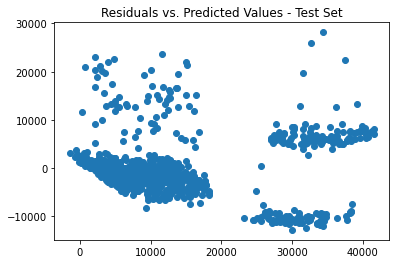

In [8]:
plt.scatter(res.predict(X),res.resid)
plt.title("Residuals vs. Predicted Values - Test Set")

The plot of the residuals is not very encouraging for this model. There seems to be a wide range of over and under estimates on the charges. While our analysis revealed a lot of important information about the impact of smoking, the model we built does not seem to be terribly accurate with predictions.

<h1>Next Steps</h1>

Unfortunately, the model in its current state is not likely to provide the results that we are hoping for. It does, however, demonstrate that, with more data and features, and perhaps a more robust tools, we could build a useful model.

Going forward I would encourage the company to prepare more features from the data that might help predict the charges. We would also want to scale up the size of the data to better train a new model.